**Hypothesis situation:** seller A, one of our clients, achieved 10Bils+ VND for gross revenue in July, In August, they want to double this achievement. Therefore, our KPI in August is to reach 20B VND for gross revenue and our responsibility is to provide a concrete action plan on how to achieve that KPI.


**Supporting materials**: *data attached is just sample for testing purposes only*
- (1) historical sales performance data from internal Order Management System
- (2) traffic source performance data from Google Analytics

**Challenge:**
- Give a summary on the key findings from given dataset and how you analyze to get those findings
- Propose a few actions we need to take, why and how we should implement it to achieve the above KPI.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import pandas_profiling as pp
from pandas_profiling import ProfileReport

from sklearn.linear_model import LinearRegression

# Order

In [2]:
order = pd.read_excel('Sample_Customore_Order raw.xlsx', sheet_name='raw')
order.head()

customer_unique_id    order_id  item_quantity created_day  \
0                   1  A000000001              1  2019-07-01   
1                   2  A000000002              1  2019-07-01   
2                   3  A000000003              1  2019-07-01   
3                   4  A000000004              1  2019-07-01   
4                   5  A000000005              1  2019-07-01   

   onsite_original_price  selling_price  shipping_fee  voucher_platform  \
0                 338000         259000          3000                 0   
1                 175000         139000             0                 0   
2                 520000         359000         14927                 0   
3                 238000         185000         29645                 0   
4                 159000         129000         14927                 0   

   voucher_seller    payment_method order_status  
0               0       Airpay GIRO    CANCELLED  
1               0  Cash on Delivery    COMPLETED  
2               0       Cybersource    COMPLETED  
3               0  Cash on Delivery    COMPLETED  
4               0  Cash on Delivery    CANCELLED

In [3]:
order_report = ProfileReport(order, title="Order data Report")

In [4]:
order_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Descriptive Analysis
- There are **61728 transactions**, **30513 distinct customers**, and **37835 orders** as well
- More than **90% transactions had 1 item**, while the maximum quanity in a transaction is 198
- **12th July** witnessed a **peak** in number of transactions, with more than **30K orders** on the mentioned day
- The **mean and median** of **original price** were **235K and 195K** respectively while such figures for **selling price** were **152K and 125K**, meaning that both distributions were highly right skewed
- **Free shipping** accounted for **44.4**% of all transactions whereas 384.5K was the highest shipping fee
- There was **no promotion/voucher from platforms or sellers**
- Custmers had a variety of **payment methods** with **6 options** (after combining all VN Airpay Ibanking) and the common one was **COD**
- It showed that **one-fifth** of transactions were **cancelled** while the rest were completed sucessfully

In [5]:
order['created_day'].value_counts()

2019-07-12    30497
2019-07-11     5646
2019-07-10     2969
2019-07-09     2333
2019-07-28     2255
2019-07-07     1900
2019-07-27     1814
2019-07-17     1387
2019-07-14      993
2019-07-13      959
2019-07-08      916
2019-07-30      881
2019-07-05      822
2019-07-29      801
2019-07-03      794
2019-07-15      752
2019-07-19      658
2019-07-01      632
2019-07-04      577
2019-07-25      575
2019-07-24      562
2019-07-20      555
2019-07-02      555
2019-07-21      520
2019-07-18      520
2019-07-23      435
2019-07-22      420
Name: created_day, dtype: int64

*The customers can use different Ibanking accounts to pay for their bills. Hence, we can group those to 1 payment method* ***VN Airpay Ibanking***

In [6]:
order['payment'] = order['payment_method'].str.replace(r' \(.+', "", regex=True)

In [7]:
order['payment'].value_counts()

Cash on Delivery      53988
Airpay GIRO            2804
Cybersource            2029
Airpay Wallet V2       1367
VN Airpay Ibanking     1174
Shopee Wallet           366
Name: payment, dtype: int64

In [8]:
order

customer_unique_id    order_id  item_quantity created_day  \
0                       1  A000000001              1  2019-07-01   
1                       2  A000000002              1  2019-07-01   
2                       3  A000000003              1  2019-07-01   
3                       4  A000000004              1  2019-07-01   
4                       5  A000000005              1  2019-07-01   
...                   ...         ...            ...         ...   
61723               30091  A000037831              1  2019-07-30   
61724               30511  A000037832              1  2019-07-30   
61725               30512  A000037833              1  2019-07-30   
61726               30513  A000037834              1  2019-07-30   
61727               30060  A000037835              1  2019-07-30   

       onsite_original_price  selling_price  shipping_fee  voucher_platform  \
0                     338000         259000          3000                 0   
1                     175000         139000             0                 0   
2                     520000         359000         14927                 0   
3                     238000         185000         29645                 0   
4                     159000         129000         14927                 0   
...                      ...            ...           ...               ...   
61723                 155000         119000         10000                 0   
61724                 475000         399000         10000                 0   
61725                 135000          99000         35641                 0   
61726                 350000         209000             0                 0   
61727                 215000         165000             0                 0   

       voucher_seller                    payment_method order_status  \
0                   0                       Airpay GIRO    CANCELLED   
1                   0                  Cash on Delivery    COMPLETED   
2                   0                       Cybersource    COMPLETED   
3                   0                  Cash on Delivery    COMPLETED   
4                   0                  Cash on Delivery    CANCELLED   
...               ...                               ...          ...   
61723               0                  Cash on Delivery    COMPLETED   
61724               0                  Cash on Delivery    COMPLETED   
61725               0                  Cash on Delivery    COMPLETED   
61726               0  VN Airpay Ibanking (Techcombank)    CANCELLED   
61727               0                  Cash on Delivery    COMPLETED   

                  payment  
0             Airpay GIRO  
1        Cash on Delivery  
2             Cybersource  
3        Cash on Delivery  
4        Cash on Delivery  
...                   ...  
61723    Cash on Delivery  
61724    Cash on Delivery  
61725    Cash on Delivery  
61726  VN Airpay Ibanking  
61727    Cash on Delivery  

[61728 rows x 12 columns]

### How much item was discounted from original price?

In [9]:
order['discounted'] = np.round(1 - order['selling_price']/order['onsite_original_price'], 2)

<AxesSubplot:>

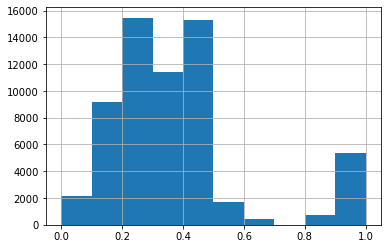

In [10]:
order['discounted'].hist(bins=10)

In [11]:
order['discounted'].describe()

count    61728.000000
mean         0.375884
std          0.232946
min          0.000000
25%          0.230000
50%          0.330000
75%          0.450000
max          1.000000
Name: discounted, dtype: float64

*On average, one item was **discounted 37.5%** from its original price*

### Why orders was cancelled?

In [12]:
completed = order[order['order_status'] == 'COMPLETED']
cancelled = order[order['order_status'] == 'CANCELLED']

#### shipping fee

In [13]:
completed['shipping_fee'].describe()

count     49717.000000
mean      10237.513949
std       14970.710976
min           0.000000
25%           0.000000
50%        2000.000000
75%       15100.000000
max      191000.000000
Name: shipping_fee, dtype: float64

In [14]:
cancelled['shipping_fee'].describe()

count     12011.000000
mean      15138.297477
std       19866.206844
min           0.000000
25%           0.000000
50%       10000.000000
75%       25500.000000
max      384500.000000
Name: shipping_fee, dtype: float64

*The mean and median of cancelled orders were higher than that of completed order. Hence, we can say that* ***the more shipping fee, the more likely order could be cancelled***

#### discounted percentage

In [15]:
order.groupby('order_status').agg({'discounted': 'mean'})

discounted
order_status            
CANCELLED       0.374662
COMPLETED       0.376179

*The discounted percentage of completed and cancelled order were the same, meaning that the figure did not effect the status of order*

#### payment

In [16]:
cancelled['payment'].value_counts(normalize=True)

Cash on Delivery      0.867372
VN Airpay Ibanking    0.059529
Airpay GIRO           0.049704
Airpay Wallet V2      0.013987
Cybersource           0.007327
Shopee Wallet         0.002081
Name: payment, dtype: float64

In [17]:
completed['payment'].value_counts(normalize=True)

Cash on Delivery      0.876360
Airpay GIRO           0.044391
Cybersource           0.039041
Airpay Wallet V2      0.024116
VN Airpay Ibanking    0.009232
Shopee Wallet         0.006859
Name: payment, dtype: float64

*Most of cancelled transaction were paid by COD, meaning that* ***COD payment had a huge impact on order status***

**selling price**

In [18]:
completed['selling_price'].describe()

count    4.971700e+04
mean     1.516545e+05
std      1.176184e+05
min      0.000000e+00
25%      8.900000e+04
50%      1.250000e+05
75%      1.790000e+05
max      1.579000e+06
Name: selling_price, dtype: float64

In [19]:
cancelled['selling_price'].describe()

count    1.201100e+04
mean     1.507668e+05
std      1.187468e+05
min      0.000000e+00
25%      8.900000e+04
50%      1.250000e+05
75%      1.790000e+05
max      1.579000e+06
Name: selling_price, dtype: float64

*It seems selling price does not have any influence on order status*

#### created_day

In [20]:
status_by_day = order.groupby(['created_day', 'order_status']).size().reset_index().rename(columns={0: 'value'})
status_by_day = pd.pivot_table(data=status_by_day, values='value', index='created_day', columns='order_status').reset_index()
status_by_day['ratio'] = np.round(status_by_day['CANCELLED'] / (status_by_day['CANCELLED']+status_by_day['COMPLETED']), 2)
status_by_day

order_status created_day  CANCELLED  COMPLETED  ratio
0             2019-07-01        146        486   0.23
1             2019-07-02        127        428   0.23
2             2019-07-03        137        657   0.17
3             2019-07-04        112        465   0.19
4             2019-07-05        139        683   0.17
5             2019-07-07        379       1521   0.20
6             2019-07-08        159        757   0.17
7             2019-07-09        480       1853   0.21
8             2019-07-10        510       2459   0.17
9             2019-07-11        991       4655   0.18
10            2019-07-12       6054      24443   0.20
11            2019-07-13        194        765   0.20
12            2019-07-14        200        793   0.20
13            2019-07-15        167        585   0.22
14            2019-07-17        289       1098   0.21
15            2019-07-18         96        424   0.18
16            2019-07-19        105        553   0.16
17            2019-07-20        124        431   0.22
18            2019-07-21         72        448   0.14
19            2019-07-22         97        323   0.23
20            2019-07-23        102        333   0.23
21            2019-07-24        109        453   0.19
22            2019-07-25         90        485   0.16
23            2019-07-27        398       1416   0.22
24            2019-07-28        388       1867   0.17
25            2019-07-29        153        648   0.19
26            2019-07-30        193        688   0.22

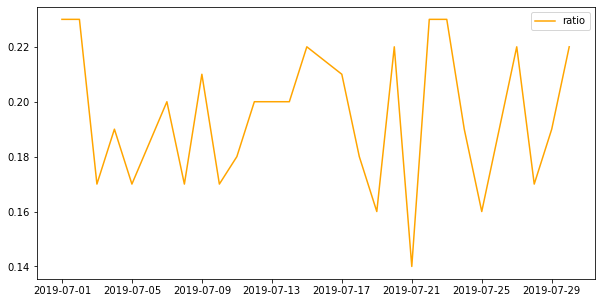

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(status_by_day['created_day'], status_by_day['ratio'], label='ratio', color='orange')

plt.legend()
plt.show()

*The ratio of cancelled transaction was fluctuated during a month, hence there is no specific pattern of cancelled transaction by day*

#### In conclusion, there are 2 factors: _shipping fee_ and _COD payment_ that had a great influence on cancelled transactions

# Traffic

In [22]:
traffic = pd.read_excel('Sample_Customore_Traffic raw.xlsx')
traffic

Source / Medium   Users  New Users  \
0                                         google / cpc  407950     344502   
1                                     youtube / social   77785      55537   
2                                    (direct) / (none)   64653      60181   
3                                    facebook / social   48721      32781   
4                               youtube.com / referral   27718      17774   
..                                                 ...     ...        ...   
193  www-dienmayxanh-com.cdn.ampproject.org / local...       1          0   
194                      xiaomiviet.vn / local_display       1          0   
195                           xnxx.com / local_display       1          0   
196                                   zalo / (not set)       1          1   
197                                                NaN  657602     530065   

     Sessions  Bounce Rate  Pages / Session  Avg. Session Duration  \
0      723208     0.621901         3.556041             176.025681   
1      163447     0.788115         2.244324              89.944740   
2      108534     0.553264         4.120340             200.429165   
3      176662     0.844002         1.858996              73.206094   
4       42464     0.639224         2.983563             148.443882   
..        ...          ...              ...                    ...   
193         1     1.000000         1.000000               0.000000   
194         2     0.000000         4.500000             113.000000   
195         2     0.500000         1.500000               6.000000   
196         1     1.000000         1.000000               0.000000   
197   1261203     0.668026         3.186523             154.494743   

     Ecommerce Conversion Rate  Transactions       Revenue  
0                     0.009079          6566  6.656088e+09  
1                     0.005855           957  8.429079e+08  
2                     0.009656          1048  1.040851e+09  
3                     0.002830           500  5.344857e+08  
4                     0.011963           508  4.025419e+08  
..                         ...           ...           ...  
193                   0.000000             0  0.000000e+00  
194                   0.000000             0  0.000000e+00  
195                   0.000000             0  0.000000e+00  
196                   0.000000             0  0.000000e+00  
197                   0.007990         10077  1.004147e+10  

[198 rows x 10 columns]

In [23]:
# romove last row
traffic.drop(index=197, inplace=True)

# remove sources with low transactions
traffic = traffic[traffic['Transactions'] > 3].reset_index().drop(columns=['index'])

In [24]:
traffic

Source / Medium   Users  New Users  Sessions  Bounce Rate  \
0                      google / cpc  407950     344502    723208     0.621901   
1                  youtube / social   77785      55537    163447     0.788115   
2                 (direct) / (none)   64653      60181    108534     0.553264   
3                 facebook / social   48721      32781    176662     0.844002   
4            youtube.com / referral   27718      17774     42464     0.639224   
5         m.facebook.com / referral   14373      10110     17631     0.699733   
6         l.facebook.com / referral    3661       1712      7144     0.370521   
7                       zalo / zalo    2782       2400      4029     0.668404   
8               youtube / (not set)    1741        875      2311     0.794461   
9           facebook.com / referral    1594        694      2557     0.495894   
10        googleapis.com / referral    1411        742      2823     0.682607   
11               instagram / social    1210        336      1402     0.848074   
12               newsletter / email     781        393      2168     0.404520   
13                  yahoo / organic     451        367       629     0.540541   
14                   bing / organic     336        277       520     0.513462   
15               newsletter / email     300        171       662     0.444109   
16               newsletter / email     228        108       517     0.464217   
17       lm.facebook.com / referral     147         44       248     0.419355   
18  l.messenger.com / local_display     142         57       264     0.431818   

    Pages / Session  Avg. Session Duration  Ecommerce Conversion Rate  \
0          3.556041             176.025681                   0.009079   
1          2.244324              89.944740                   0.005855   
2          4.120340             200.429165                   0.009656   
3          1.858996              73.206094                   0.002830   
4          2.983563             148.443882                   0.011963   
5          2.241960              87.386422                   0.007203   
6          6.868421             736.728024                   0.014418   
7          2.534624             147.251179                   0.010673   
8          2.078321              68.363912                   0.003029   
9          4.674228             288.270630                   0.011341   
10         3.174283             145.960326                   0.001771   
11         1.852354              75.766762                   0.002853   
12         5.881458             331.996771                   0.028137   
13         4.356121             244.817170                   0.022258   
14         5.146154             268.021154                   0.009615   
15         5.339879             282.285498                   0.033233   
16         5.665377             268.313346                   0.013540   
17         5.028226             267.209677                   0.016129   
18         4.981061             298.098485                   0.037879   

    Transactions       Revenue  
0           6566  6.656088e+09  
1            957  8.429079e+08  
2           1048  1.040851e+09  
3            500  5.344857e+08  
4            508  4.025419e+08  
5            127  1.141888e+08  
6            103  1.508016e+08  
7             43  3.732781e+07  
8              7  9.263414e+06  
9             29  2.093145e+07  
10             5  1.152069e+07  
11             4  3.550774e+06  
12            61  9.891079e+07  
13            14  9.746573e+06  
14             5  6.859999e+06  
15            22  1.672970e+07  
16             7  2.548345e+06  
17             4  2.125633e+06  
18            10  1.230573e+07

In [25]:
traffic_report = ProfileReport(traffic, title="Traffic data Report")

In [26]:
traffic_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Descriptive Analysis
- The number of **users and new users** are **655984 and 529061** respectively
- The **mean of bounce rate** were **59%**
- The median of **average session duration** is **200s**
- The **median of conversion rate** is **1.13%**, which can infer that the business was working well
- The **total revenue** was **10B+ VND**

# Action plan to reach 20B+ revenue

## 1. Minimize cancelled transaction

In [27]:
cancelled.head()

customer_unique_id    order_id  item_quantity created_day  \
0                    1  A000000001              1  2019-07-01   
4                    5  A000000005              1  2019-07-01   
8                    8  A000000008              1  2019-07-01   
9                    9  A000000009              1  2019-07-01   
11                  11  A000000011              1  2019-07-01   

    onsite_original_price  selling_price  shipping_fee  voucher_platform  \
0                  338000         259000          3000                 0   
4                  159000         129000         14927                 0   
8                  199000         169000         40297                 0   
9                  198000         169000             0                 0   
11                 205000         169000         29980                 0   

    voucher_seller    payment_method order_status           payment  \
0                0       Airpay GIRO    CANCELLED       Airpay GIRO   
4                0  Cash on Delivery    CANCELLED  Cash on Delivery   
8                0  Cash on Delivery    CANCELLED  Cash on Delivery   
9                0  Cash on Delivery    CANCELLED  Cash on Delivery   
11               0  Cash on Delivery    CANCELLED  Cash on Delivery   

    discounted  
0         0.23  
4         0.19  
8         0.15  
9         0.15  
11        0.18

In [28]:
(cancelled['onsite_original_price'] * cancelled['item_quantity']).sum()

3110438000

*As we examined before, shipping fee and COD payment were 2 factors that impacted on the order status. Hence, we should **reduce the delivery fee** by cooperating with multiple delivery services, meaning that customers have more shipping options for their orders. Also, since more than 86% of cancelled transaction used COD, other payment methods should be taken into account by* ***offering discounted vouchers for Ibanking payment***

*The total price for cancelled transactions were high, so if these orders can be minimized as low as possible, we may* ***save up to 3B+ VND***

## 2. Increase completed transaction

In [29]:
order['order_status'].value_counts(normalize=True)

COMPLETED    0.805421
CANCELLED    0.194579
Name: order_status, dtype: float64

*80% of transactions were completed sucessfully. However, we also try to maximize these orders by giving **more platform and seller vouchers**. The more vouchers we offer, the more likely customers will purchase products, resulting in higher probability of completed transactions*

## 3. Attract more customers

In [30]:
traffic[['New Users', 'Revenue']].corr()

New Users   Revenue
New Users   1.000000  0.998731
Revenue     0.998731  1.000000

*As we can see, new users had a high correlation with revenue. Hence, we can predict the revenue based on new users*

In [31]:
X = traffic.iloc[:, 2].values.reshape(-1, 1)
y = traffic.iloc[:, -1].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

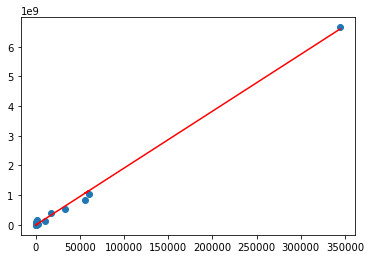

In [32]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [33]:
August_revenue = 20000000000

In [34]:
new_users = int(((August_revenue - model.intercept_) / model.coef_)[0][0])
new_users

1043321

*If we aim to reach 20B+ on gross revenue, we should attract roughly* ***1 million new users***

### Which channel we should focus on?

In [35]:
# Extract Channel from Sources

def channel(x):
    if ('email' in x):
        return 'Email'
    elif ('google' in x):
        return 'Google'
    elif ('facebook' in x):
        return 'Facebook'
    elif ('bing' in x):
        return 'Bing'
    elif ('yahoo' in x):
        return 'Yahoo'
    elif ('instagram' in x):
        return 'Instagram'
    elif ('youtube' in x):
        return 'Youtube'
    elif ('zalo' in x):
        return 'Zalo'
    elif ('messenger' in x):
        return 'Messenger'
    else:
        return 'none'


traffic['Channel'] = traffic.apply(lambda z: channel(z['Source / Medium']), axis=1)

In [36]:
sources = traffic.groupby('Channel').agg({'Revenue': 'sum', 'Transactions': 'sum'}).reset_index()
sources['Revenue per Trans'] = np.round(sources['Revenue'] / sources['Transactions'], 2)
sources.sort_values(by='Revenue per Trans', ascending=False, ignore_index=True, inplace=True)
sources.reset_index()
sources

Channel       Revenue  Transactions  Revenue per Trans
0       Bing  6.859999e+06             5         1371999.74
1      Email  1.181888e+08            90         1313209.33
2  Messenger  1.230573e+07            10         1230572.65
3   Facebook  8.225332e+08           763         1078025.16
4     Google  6.667609e+09          6571         1014702.30
5       none  1.040851e+09          1048          993178.86
6  Instagram  3.550774e+06             4          887693.49
7       Zalo  3.732781e+07            43          868088.68
8    Youtube  1.254713e+09          1472          852386.73
9      Yahoo  9.746573e+06            14          696183.76

*Though Youtube ranked the second in transactions, its revenue per transaction was lower than Facebook and Google. Also, despite high value in revenue per transaction, Bing and Messenger had small number of transactions. The channel we should **focus** on are **Facebook, Google, and Email** - those were good in both transactions and revenue per transaction metrics*

# In conclusion, to reach 20B+ VND in gross revenue, we should:
### 1. Minimize cancelled transaction
- reduce delivery fee
- offer vouchers for card payment methods

### 2. Increase completed transaction
- more platform vouchers
- more seller vouchers

### 3. Attract more customers
- **attract** roughly **1 million new users**
- reduce bounce rate
- increase conversion rate
- **focus on Facebook, Google, and Email channels**